In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.linalg import svd
import sympy as sp
sp.init_printing()


data = pd.read_excel("data/Concrete_Data.xls")
z = data["Cement (component 1)(kg in a m^3 mixture)"]
y = data["Water  (component 4)(kg in a m^3 mixture)"]
x = data["Concrete compressive strength(MPa, megapascals) "]
days = data["Age (day)"]

# fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,8))
# ax.scatter(x, y, z)

# ax.set_xlabel('Concrete strength')
# ax.set_ylabel('Water')
# ax.set_zlabel('Cement')


#### The principal directions of the considered PCA components.  Plot and interpret the components in terms of the attributes

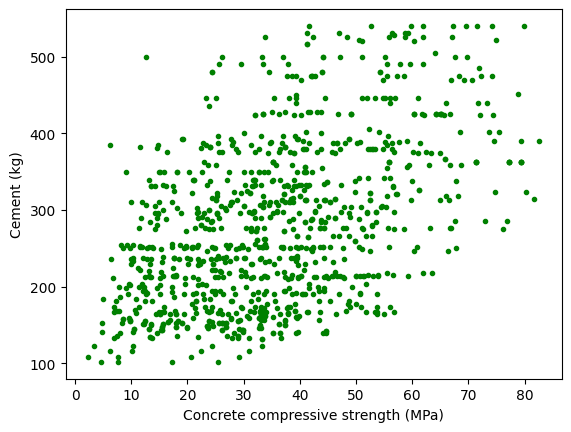

<Figure size 640x480 with 0 Axes>

In [11]:
data = pd.read_excel("data/Concrete_Data.xls")
# Make another more fancy plot that includes legend, class labels,
# attribute names, and a title.
plt.plot(x,z,'o', color='green', markersize=3)
plt.xlabel("Concrete compressive strength (MPa)")
plt.ylabel("Cement (kg)")
#plt.plot(x, y, color='green', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=12)
f = plt.figure()



####  The amount of variance explained as a function of the number of PCA components included

#### The data projected onto the considered principal components, e.g. in 2D scatter plots (hint: it may be helpful to color code the points according to the value of the attribute you wish to predict)

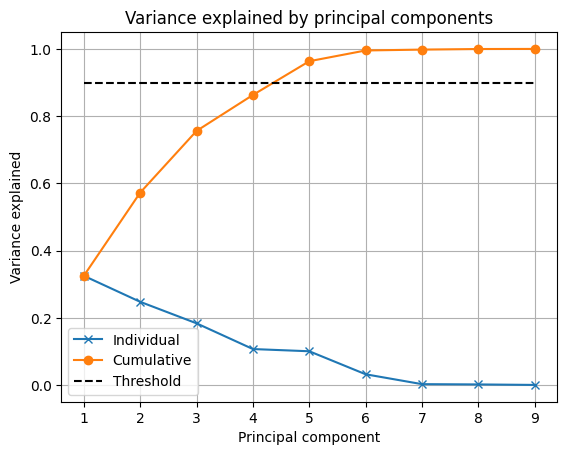

In [ ]:
N = len(x)
data_np = data.to_numpy()
Y = data_np - np.ones((N, 1)) * data_np.mean(axis=0)
U, S, Vh = svd(Y, full_matrices=False)
rho = (S * S) / (S * S).sum()

threshold = 0.9

# Plot variance explained
plt.figure()
plt.plot(range(1, len(rho) + 1), rho, "x-")
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-")
plt.plot([1, len(rho)], [threshold, threshold], "k--")
plt.title("Variance explained by principal components")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.legend(["Individual", "Cumulative", "Threshold"])
plt.grid()
plt.show()

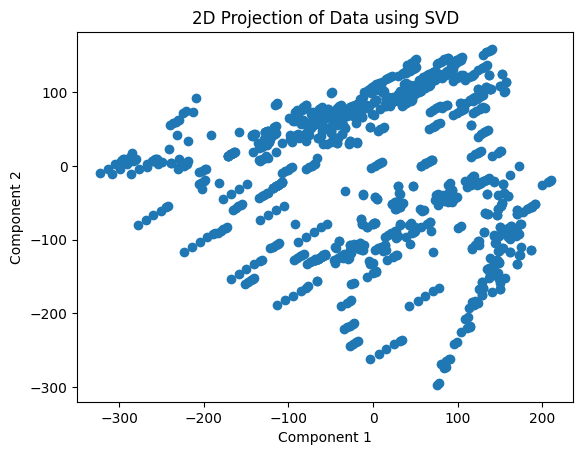

In [ ]:
k = 2
Vk = Vh[:k, :].T  # Transpose to get the right singular vectors (p x k)

X_transformed = np.dot(Y, Vk)  # Project onto the first k components

#Plot the projected data 
plt.scatter(X_transformed[:, 0], X_transformed[:, 1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2D Projection of Data using SVD')
plt.show()